# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

[Film](https://en.wikipedia.org/wiki/Film#Industry) is a visual art used to simulate experiences that communicate ideas, stories, perceptions, feelings, beauty, or atmosphere through the use of moving images. Although films are a kind of art, it's also an [industry](https://en.wikipedia.org/wiki/Film_industry) that worth, globally, $136 billion in 2018. 

So, with a lot of money at stake, lots of questions are raised, like: What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Can we predict which films will be highly rated, whether or not they are a commercial success? Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues? These questions are more important than ever to the industry.

In this project, we will be analysing The Movie Database (TMDb), which is a dataset that contains informations about 10,000 movies, trying to answer some of those questions. We will focus our attention in the following questions:
- Which genres are most popular from year to year? 
- What kinds of properties are associated with movies that have high revenues?


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data in a DataFrame
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


- Check the size of the dataset

In [3]:
df.shape

(10866, 21)

- Check the data type and number of non-null values in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- Check some summary statistics to see a overview of the dataset

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


    - Is there a film with 15 hours runtime, while the median is only 99 minutes?

In [6]:
df[df.runtime == 900]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


Searching on Google, we discover that the runtime of the movie [The Story of Film: An Odyssey](https://en.wikipedia.org/wiki/The_Story_of_Film:_An_Odyssey#:~:text=The%20Story%20of%20Film%3A%20An%20Odyssey%20is%20a%202011%20British,book%20The%20Story%20of%20Film.) is, indeed, correct, that is, 900 minutes.

- Check for duplicates rows

In [7]:
df.duplicated().sum()

1

- Chek for any missing values in the dataset

In [8]:
df.isnull().sum()[df.isnull().sum() != 0]

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

- Check unique values

In [9]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

- Check the distribuitions of `revenue_adj` and `budget_adj`:

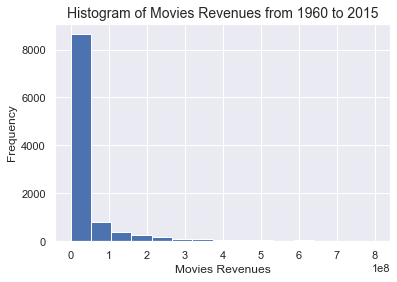

In [10]:
plt.hist(df.revenue_adj, bins=15, range=(0,0.8e9))
plt.title("Histogram of Movies Revenues from 1960 to 2015", fontsize=14)
plt.xlabel("Movies Revenues")
plt.ylabel("Frequency");

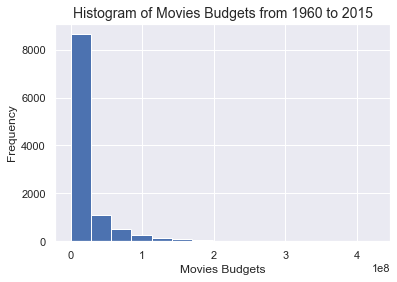

In [11]:
plt.hist(df.budget_adj, bins=15)
plt.title("Histogram of Movies Budgets from 1960 to 2015", fontsize=14)
plt.xlabel("Movies Budgets")
plt.ylabel("Frequency");

As we can see above, there are a lot of values in the `revenue_adj` column and the `budget_adj` column that will be needed to be fixed, since it seems that many values are equal to zero.

### Cleaning The Movie Database

#### 1. Drop unused columns
We will eliminate 7 columns that will not be needed for the following analyzes.

In [12]:
df.drop(columns=["imdb_id", "homepage", "budget", "revenue", "overview", "tagline", "keywords"], inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.shape

(10866, 14)

#### 2. Fix data types
We will convert the column `release_date` from string to datetime.

In [14]:
df.release_date = pd.to_datetime(df.release_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   original_title        10866 non-null  object        
 3   cast                  10790 non-null  object        
 4   director              10822 non-null  object        
 5   runtime               10866 non-null  int64         
 6   genres                10843 non-null  object        
 7   production_companies  9836 non-null   object        
 8   release_date          10866 non-null  datetime64[ns]
 9   vote_count            10866 non-null  int64         
 10  vote_average          10866 non-null  float64       
 11  release_year          10866 non-null  int64         
 12  budget_adj            10866 non-null  float64       
 13  revenue_adj     

#### 3. Drop NAs

We will eliminate any row with missing values, because every property that have correlations with the movie revenue, have differents columns with missing values. So, in order to consider the same movies in the following analyzes, the best course of action is to drop all the rows with NAs.

In [15]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [17]:
df.shape

(9773, 14)

#### 4. Handle `runtime`, `budget_adj`,	`revenue_adj` with Zeros

We will handle the rows with zero in the columns: `runtime`, `budget_adj` and `revenue_adj`.

**4.1. Zeros in the 3 columns:**<br>
For all the rows that have zero in the previous 3 columns, we will drop those rows, since it is missing too many values there.

In [18]:
df.drop(index=df[(df.revenue_adj == 0) & (df.budget_adj == 0) & (df.runtime == 0)].index, inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
df.shape

(9761, 14)

**4.2. Column `runtime` with Zero:**<br>
We will handle the rows with zero in the `runtime` column. First, we need to see how those rows look like:

In [20]:
df[df.runtime == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0


Since there is only 1 row with zero in the `runtime` column, a quick search on [Google](https://en.wikipedia.org/wiki/Treehouse_(film)) shows that the value is 98 minutes.

In [21]:
df.loc[df.runtime == 0, "runtime"] = 98
df[df.runtime == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


**4.3. Column `revenue_adj` with Zero:**<br>
We will handle the rows with zero in the `revenue_adj` column by filling in the values with the averages revenues of each year. First, we will replace the zeros with NaNs, since Pandas already has a built-in function to handle with this.

In [22]:
df.loc[df.revenue_adj == 0, "revenue_adj"] = np.nan
df.loc[df.revenue_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


After that, we can fill in the NaNs with the averages revenues of each year.

In [23]:
df.revenue_adj = df.groupby("release_year").transform(lambda x: x.fillna(x.mean())).revenue_adj
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
df[df.revenue_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


**4.4. Column `budget_adj` with Zero:**<br>
We will handle the rows with zero in the `budget_adj` column by filling in the values with the averages budgets of each year. First, we will replace the zeros with NaNs, since Pandas already has a built-in function to handle with this.

In [25]:
df.loc[df.budget_adj == 0, "budget_adj"] = np.nan
df.loc[df.budget_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


After that, we can fill in the NaNs with the averages budgets of each year.

In [26]:
df.budget_adj = df.groupby("release_year").transform(lambda x: x.fillna(x.mean())).budget_adj
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
df[df.budget_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### 5. Unique elements in each columns
We will split the elements separated by `|` in the columns: `cast`, `director`, `genres` and `production_companies`

In [28]:
# The function split_values splits the values separated by "|" 
def split_values(id, values, column):
    new_rows = []
    values = values.split("|")
    for value in values:
        row = {"id": id, column: value}
        new_rows.append(row)
    return new_rows

In [29]:
# The function create_new_df_data will create a list of dictionaries containing the "id" of the movie 
# and the values that were separated in the split_values function
def create_new_df_data(list_list_values):
    data = []
    for list_values in list_list_values:
        for values in list_values:
            data.append(values)
    return data

In [30]:
# The function create_new_df will use both functions above to create a dataframe with the "id" of the movie 
# and the values of each one of the following columns: "cast", "director", "genres", "production_companies"
def create_new_df(df, column):
    list_values = [split_values(id, values, column) for id, values in zip(df.id, df[column])]
    data = create_new_df_data(list_values)
    return pd.DataFrame(data)

We will need the original DataFrame as we change one of the columns at time.

In [31]:
df_original = df.copy()

Finally, we can create the new DataFrame without `|`separating values.

In [32]:
columns = ["cast", "director", "genres", "production_companies"]
for column in columns:
    df_aux = create_new_df(df_original[df_original[column].notnull()], column)
    df.drop(columns=column, inplace=True)
    df = df.merge(df_aux, on="id", how="left")

df.head(10)

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast,director,genres,production_companies
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action,Universal Studios
1,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action,Amblin Entertainment
2,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action,Legendary Pictures
3,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action,Fuji Television Network
4,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Action,Dentsu
5,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Adventure,Universal Studios
6,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Adventure,Amblin Entertainment
7,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Adventure,Legendary Pictures
8,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Adventure,Fuji Television Network
9,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Colin Trevorrow,Adventure,Dentsu


In [33]:
df.shape

(318066, 14)

We can test the columns to check if we still have some values separated by `|`.

In [34]:
print("Number of | by column:")
for column in df.columns:
    if df[column].dtype == "object":
        print(f"{column}:", df[column].str.contains("|", regex=False).sum()) 

Number of | by column:
original_title: 0
cast: 0
director: 0
genres: 0
production_companies: 0


#### 6. Drop duplicate rows
We will eliminate any duplicate rows.

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [36]:
df.shape

(316393, 14)

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

First, we will create a DataFrame only with the `id` of the movie, the release year, the genre and the popularity.

In [37]:
df_popularity_genres = df[["id", "release_year", "genres", "popularity"]]
df_popularity_genres = df_popularity_genres.drop_duplicates(ignore_index=True)
df_popularity_genres.head()

,id,release_year,genres,popularity
0,135397,2015,Action,32.985763
1,135397,2015,Adventure,32.985763
2,135397,2015,Science Fiction,32.985763
3,135397,2015,Thriller,32.985763
4,76341,2015,Action,28.419936


Later, we will group by release year and genre, calculating the mean of popularity by each unique pair of values.

In [38]:
df_genres = df_popularity_genres.groupby(["release_year", "genres"], as_index=False).popularity.mean()
df_genres

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1037,2015,Science Fiction,2.348382
1038,2015,TV Movie,0.289081
1039,2015,Thriller,1.486609
1040,2015,War,1.438548


After that, we will sort the resulting DataFrame by release year in an ascending way, and the mean of popularity in a descending way.

In [39]:
df_genres.sort_values(["release_year", "popularity"], ascending=[True, False], ignore_index=True, inplace=True)
df_genres

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1960,Adventure,0.700981
2,1960,Horror,0.591450
3,1960,Action,0.590724
4,1960,Western,0.567759
...,...,...,...
1037,2015,Drama,1.030059
1038,2015,Music,0.660579
1039,2015,Horror,0.506031
1040,2015,TV Movie,0.289081


Now, we can create a DataFrame with the most popular genre in each year.

In [40]:
years = df_genres.release_year.unique()
df_year = pd.DataFrame({"release_year": pd.Series([], dtype=int),
                        "genres": pd.Series([], dtype=str),
                        "popularity": pd.Series([], dtype=float)})
for year in years:
    df_year = df_year.append(df_genres[df_genres.release_year == year].iloc[0], ignore_index=True)
    
df_year

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.751857
7,1967,Animation,2.550704
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


And, if we consider the years from 1960 to 2015, we can see which genres were more popular over the years.

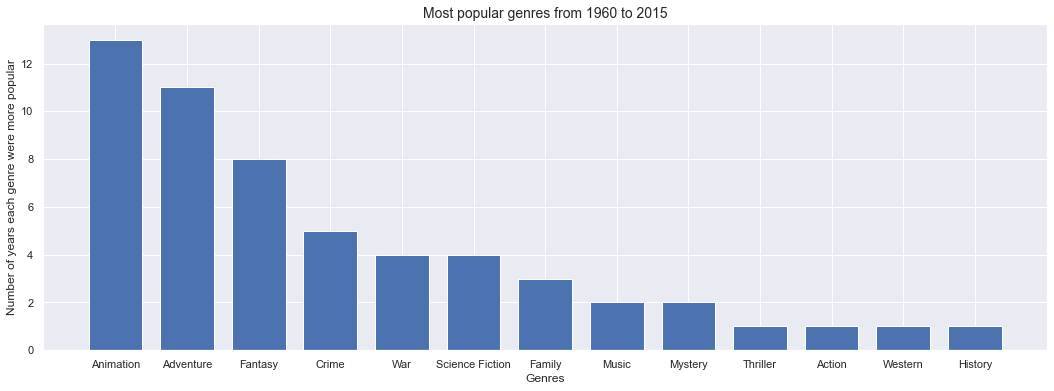

In [41]:
x = df_year.genres.value_counts()
locations = np.arange(len(x))
plt.figure(figsize=(18, 6))
plt.bar(locations, x, width=0.75)
plt.xticks(locations,  x.index)
plt.title("Most popular genres from 1960 to 2015", fontsize=14)
plt.xlabel("Genres")
plt.ylabel("Number of years each genre were more popular");

If we consider all the genres, animation has been having the highest popularity, in average, from 1960 to 2015. However, if we consider only the top 3 genres in popularity, how does the popularity of movies by genres change from 1960 to 2015?

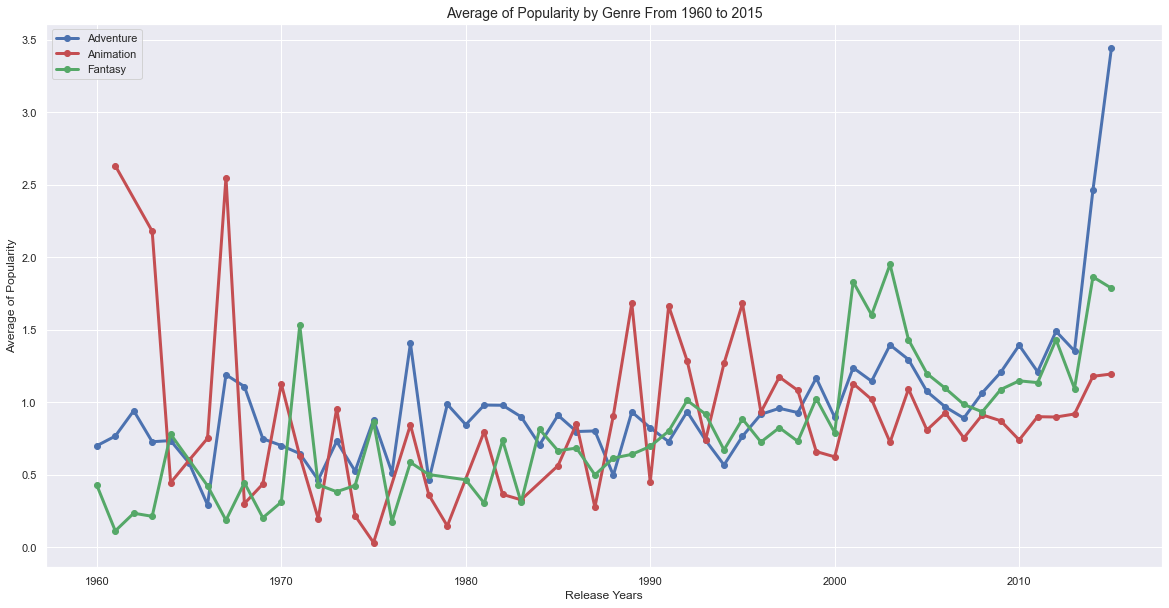

In [42]:
top_genres = {"Adventure": "b", "Animation": "r", "Fantasy": "g"}
plt.figure(figsize=(20, 10))
for genre, color in top_genres.items():
    plt.plot(df_genres.loc[df_genres.genres == genre, "release_year"], 
             df_genres.loc[df_genres.genres == genre, "popularity"], "go-", linewidth=3, color=color,  label=genre)

plt.title("Average of Popularity by Genre From 1960 to 2015", fontsize=14)
plt.xlabel("Release Years")
plt.ylabel("Average of Popularity")
plt.legend();

**Answer:** When we look at the most popular genre from 1960 to 2015, we find that Animation is the most popular one, as the most popular in 13 years. However, as we can see in the second chart above, the adventure movies have been growing in popularity from 1999 to 2015, with more popularity than animation movies in each year.

### What kinds of properties are associated with movies that have high revenues?

#### 1. Analyzing movies revenues by genres

Since there are a lot of types of genres, we will focus our attention only in the top 10. First, we will create a DataFrame only with the `id` of the movie, the genre and the revenue.

In [43]:
df_revenue_genres = df[["id", "genres", "revenue_adj"]]
df_revenue_genres = df_revenue_genres.drop_duplicates(ignore_index=True)
df_revenue_genres.head()

,id,genres,revenue_adj
0,135397,Action,1.392446e+09
1,135397,Adventure,1.392446e+09
2,135397,Science Fiction,1.392446e+09
3,135397,Thriller,1.392446e+09
4,76341,Action,3.481613e+08


After that, we can calculate the top 10 genres with the highest revenues, in average, in their movies.

In [44]:
df_genres = df_revenue_genres.groupby(["genres"]).revenue_adj.mean().sort_values(ascending=False)
df_genres = df_genres.head(10)
df_genres

genres
Adventure          2.014803e+08
Fantasy            1.765866e+08
Animation          1.707380e+08
Family             1.652962e+08
Western            1.602811e+08
Science Fiction    1.557579e+08
Action             1.539159e+08
War                1.495362e+08
History            1.247645e+08
TV Movie           1.211724e+08
Name: revenue_adj, dtype: float64

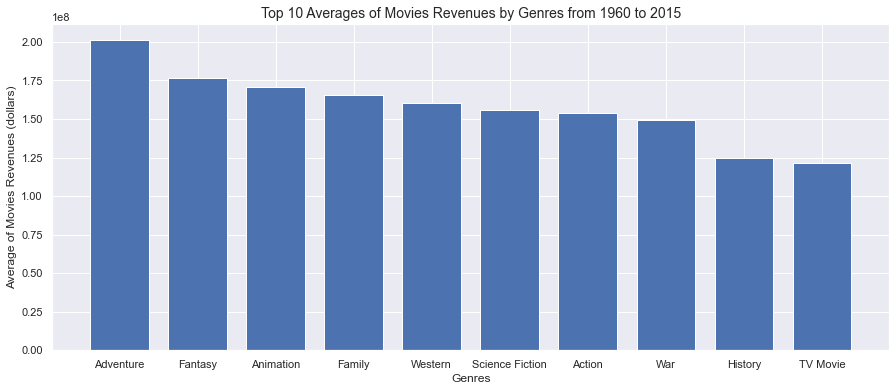

In [45]:
locations = np.arange(len(df_genres))
plt.figure(figsize=(15, 6))
plt.bar(locations, df_genres, width=0.75)
plt.xticks(locations,  df_genres.index)
plt.title("Top 10 Averages of Movies Revenues by Genres from 1960 to 2015", fontsize=14)
plt.xlabel("Genres")
plt.ylabel("Average of Movies Revenues (dollars)");

**Answer:** If we consider all the genres, adventure movies have been having the highest revenues, in average, in their movies over the time period of 1960-2015.

#### 2. Analyzing movies revenues by cast

Since there are a lot of actors and actresses, we will focus our attention only in the top 10. First, we will create a DataFrame only with the `id` of the movie, the cast and the revenue.

In [46]:
df_revenue_cast = df[["id", "cast", "revenue_adj"]]
df_revenue_cast = df_revenue_cast.drop_duplicates(ignore_index=True)
df_revenue_cast.head()

,id,cast,revenue_adj
0,135397,Chris Pratt,1.392446e+09
1,135397,Bryce Dallas Howard,1.392446e+09
2,135397,Irrfan Khan,1.392446e+09
3,135397,Vincent D'Onofrio,1.392446e+09
4,135397,Nick Robinson,1.392446e+09


There are some actors and actresses that have worked only in 1 film. So, in order to ignore cases like these, since it could be a isolated success, we will consider actors and actresses with more than 1 film in the dataset.

In [47]:
cast = df_revenue_cast.groupby("cast", as_index=False).id.count()
cast = cast[cast.id > 1]
cast.head()

,cast,id
3,50 Cent,12
4,A Martinez,2
6,A. Michael Baldwin,3
8,A.J. Cook,4
9,AJ Bowen,7


After that, we can calculate the top 10 actors and actresses with the highest revenues, in average, in their movies.

In [48]:
df_cast = df_revenue_cast.groupby(["cast"], as_index=False).revenue_adj.mean()
df_cast = df_cast[df_cast.cast.isin(cast.cast)]
df_cast = df_cast.sort_values(["revenue_adj"], ascending=[False])
df_cast = df_cast.head(10)
df_cast

,cast,revenue_adj
7216,Jason Miller,1.116226e+09
1111,Anthony Daniels,9.583798e+08
9155,Ken Howard,8.496146e+08
6492,Ian McDiarmid,8.040146e+08
16691,Wendy Gazelle,7.955701e+08
14952,Shirley Eaton,7.560587e+08
12227,Nick Robinson,7.452076e+08
2500,Carrie Fisher,7.244502e+08
13526,Richard Armitage,7.226673e+08
6867,Jake Lloyd,6.952378e+08


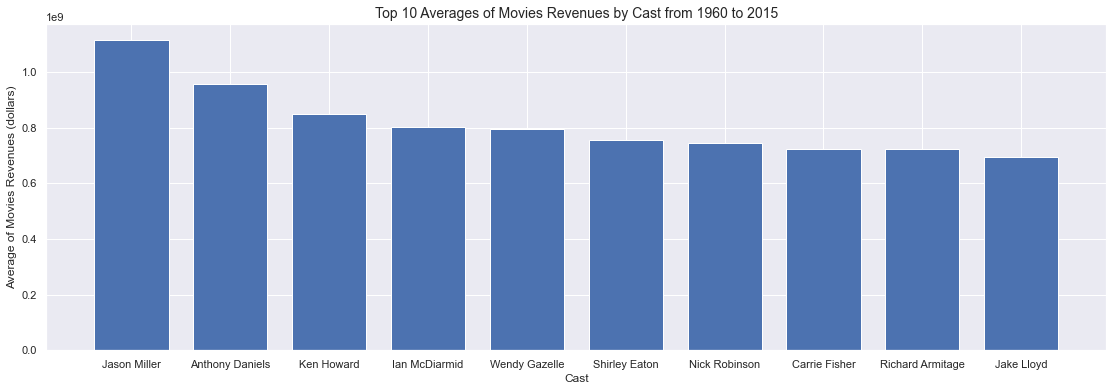

In [49]:
locations = np.arange(len(df_cast))
plt.figure(figsize=(19, 6))
plt.bar(locations, df_cast.revenue_adj, width=0.75)
plt.xticks(locations,  df_cast.cast)
plt.title("Top 10 Averages of Movies Revenues by Cast from 1960 to 2015", fontsize=14)
plt.xlabel("Cast")
plt.ylabel("Average of Movies Revenues (dollars)");

**Answer:** If we consider all the actors and actresses with more than 1 film, Jason Miller is the actor with the highest revenues, in average, in his movies over the time period of 1960-2015. As he has passed away, the next on the top is Anthony Daniels.

#### 3. Analyzing movies revenues by director

Since there are a lot of directors, we will focus our attention only in the top 10. First, we will create a DataFrame only with the `id` of the movie, the director and the revenue.

In [50]:
df_revenue_director = df[["id", "director", "revenue_adj"]]
df_revenue_director = df_revenue_director.drop_duplicates(ignore_index=True)
df_revenue_director.head()

,id,director,revenue_adj
0,135397,Colin Trevorrow,1.392446e+09
1,76341,George Miller,3.481613e+08
2,262500,Robert Schwentke,2.716190e+08
3,140607,J.J. Abrams,1.902723e+09
4,168259,James Wan,1.385749e+09


There are some directors that have worked only in 1 film. So, in order to ignore cases like these, since it could be a isolated success, we will consider directors with more than 1 film in the dataset.

In [51]:
directors = df_revenue_director.groupby("director", as_index=False).id.count()
directors = directors[directors.id > 1]
directors.head()

,director,id
6,Aaron Moorhead,2
7,Aaron Norris,3
10,Aaron Seltzer,8
16,Abel Ferrara,8
18,Adam Brooks,2


After that, we can calculate the top 10 directors with the highest revenues, in average, in their movies.

In [52]:
df_director = df_revenue_director.groupby(["director"], as_index=False).revenue_adj.mean()
df_director = df_director[df_director.director.isin(directors.director)]
df_director = df_director.sort_values(["revenue_adj"], ascending=[False])
df_director = df_director.head(10)
df_director

,director,revenue_adj
1553,George Lucas,1.052320e+09
1112,David Yates,1.044364e+09
2453,Joss Whedon,9.264080e+08
2725,Lee Unkrich,8.540177e+08
3625,Pierre Coffin,8.387905e+08
1871,James Cameron,7.536573e+08
840,Conrad Vernon,7.196849e+08
836,Colin Trevorrow,6.981261e+08
732,Chris Miller,6.891215e+08
1821,J.J. Abrams,6.829354e+08


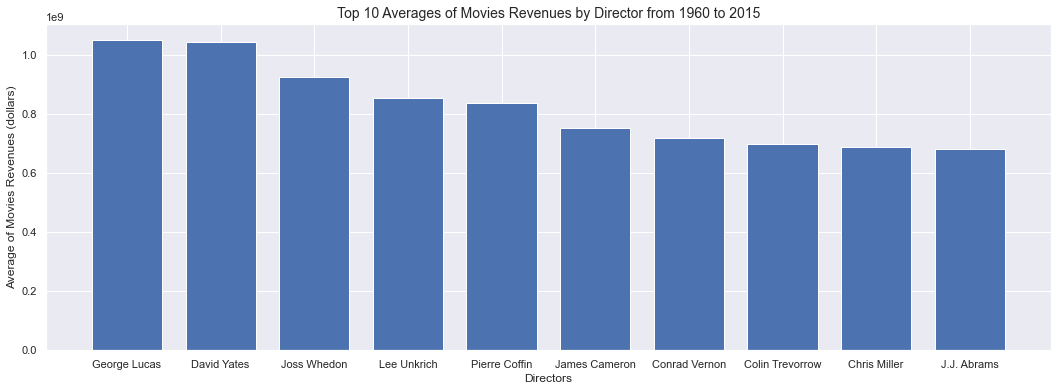

In [53]:
locations = np.arange(len(df_director.director))
plt.figure(figsize=(18, 6))
plt.bar(locations, df_director.revenue_adj, width=0.75)
plt.xticks(locations,  df_director.director)
plt.title("Top 10 Averages of Movies Revenues by Director from 1960 to 2015", fontsize=14)
plt.xlabel("Directors")
plt.ylabel("Average of Movies Revenues (dollars)");

**Answer:**  If we consider all the directors with more than 1 film directed, George Lucas has been having the highest revenues, in average, in his movies over the time period of 1960-2015.

#### 4. Analyzing movies revenues by production companies

Since there are a lot of production companies, we will focus our attention only in the top 10. First, we will create a DataFrame only with the `id` of the movie, the production company and the revenue.

In [54]:
df_revenue_companies = df[["id", "production_companies", "revenue_adj"]]
df_revenue_companies = df_revenue_companies.drop_duplicates(ignore_index=True)
df_revenue_companies.head()

,id,production_companies,revenue_adj
0,135397,Universal Studios,1.392446e+09
1,135397,Amblin Entertainment,1.392446e+09
2,135397,Legendary Pictures,1.392446e+09
3,135397,Fuji Television Network,1.392446e+09
4,135397,Dentsu,1.392446e+09


There are some production companies that have worked only in 1 film. So, in order to ignore cases like these, since it could be a isolated success, we will consider production companies with more than 1 film in the dataset.

In [55]:
companies = df_revenue_companies.groupby("production_companies", as_index=False).id.count()
companies = companies[companies.id > 1]
companies.head()

,production_companies,id
6,10th Hole Productions,4
9,120dB Films,7
11,1492 Pictures,19
18,1984 Private Defense Contractors,6
21,2 Entertain,2


After that, we can calculate the top 10 production companies with the highest revenues, in average, in their movies.

In [56]:
df_companies = df_revenue_companies.groupby("production_companies", as_index=False).revenue_adj.mean()
df_companies = df_companies[df_companies.production_companies.isin(companies.production_companies)]
df_companies = df_companies.sort_values(["revenue_adj"], ascending=[False])
df_companies = df_companies.head(10)
df_companies

,production_companies,revenue_adj
6168,Second Mate Productions,1.081672e+09
4046,Lightstorm Entertainment,9.899351e+08
5835,Revolution Sun Studios,7.696100e+08
5093,One Race Films,7.574568e+08
4163,Lucasfilm,7.373891e+08
3418,Indochina Productions,7.354440e+08
483,Argyle Enterprises,6.600787e+08
2485,Film Export A.G.,6.449012e+08
5902,Robert Wise Productions,6.319476e+08
1799,Danjaq,5.971022e+08


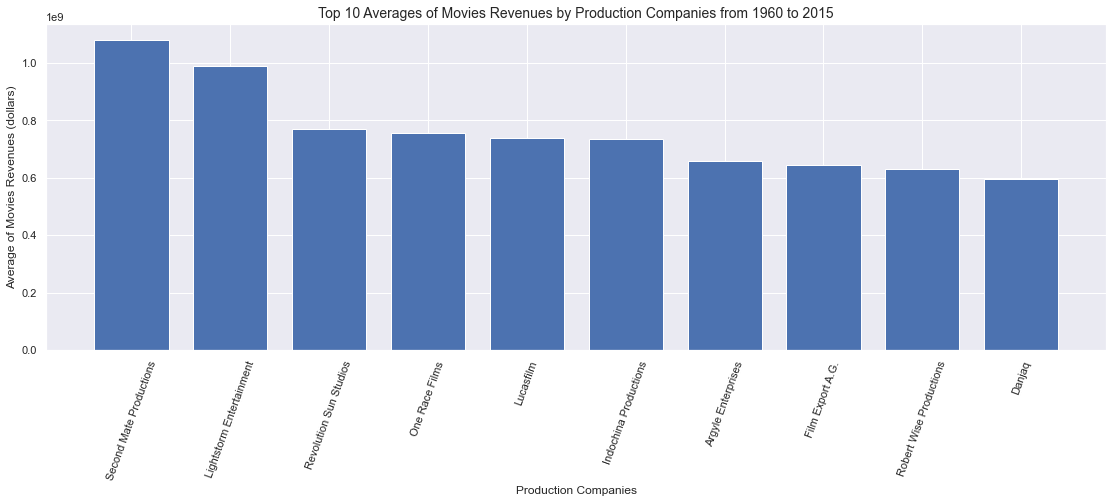

In [57]:
locations = np.arange(len(df_companies))
plt.figure(figsize=(19, 6))
plt.bar(locations, df_companies.revenue_adj, width=0.75)
plt.xticks(locations,  df_companies.production_companies, rotation=70)
plt.title("Top 10 Averages of Movies Revenues by Production Companies from 1960 to 2015", fontsize=14)
plt.xlabel("Production Companies")
plt.ylabel("Average of Movies Revenues (dollars)");

**Answer:**  If we consider all the production companies with more than 1 film produced, Second Mate Productions has been having the highest revenues, in average, in its movies over the time period of 1960-2015.

<a id='conclusions'></a>
## Conclusions

After studying `The Movie Database`, with over 10,000 movies, **we find that animation movies have been being the most popular genre of film from 1960 to 2015**. However, when we dive in the data, we discover how the preference of the audience has been changing over the last years.

**Over the time period of 1999 to 2015, the adventure movies became the most popular genre of film.** The difference between both genres reached 2.22 points of popularity in 2015, the biggest difference between both from 1960 to 2015.

Shifting our perspective of interest, when we study what kind of properties are associated with movies that have high revenue, we again encounter the adventure movies at the top.

So, adventure movies not only have the highest popularity over the time period of 1999 to 2015, but they also have the highest revenues, in average, from 1960 to 2015.

And, when we look how the cast and directors influence the revenue performance, we find that the actor, Anthony Daniels, and the director, George Lucas, have the highest revenues, in average, in their movies over the time period of 1960-2015. Moreover, both of them were at Star Wars, which, in fact, is a adventure movie.

Finally, looking at Production Companies, the production company with the highest revenues, in average, in its movies is, surprisingly, Second Mate Productions. However, when we see the types of movies that it produced, we find, again, adventure movies.

Before we can find a conclusion about the questions raised, we should state some limitations about the dataset. The most important limitation is the high number of zeros in the `budget`, `budget_adj`, `revenue` and `revenue_adj` columns. We handled this problem, but, despite the best effort to make the dataset fit to be used, this problem influenced the results.

In conclusion, the cast, the production company, and the director can influence the high revenues of movies, but a property that always came back was the genre of the movie. Despite animation has being the the most popular genre of movies from 1960 to 2015, adventure became more popular than animation from 1999 to 2015, and the genre with the most revenue, in average, from 1960 to 2015.